A continuación, se resuelven cada una de las preguntas del literal **1.PRUEBA DE SQL**, explicando el paso a paso de las consultas SQL empleadas para obtener los resultados esperados.


1. Seleccione nombre, apellido y salario de todos los empleados. 

 - Se seleccionan (**SELECT**) solo las columnas solicitadas de (**FROM**) la tabla 'empleado':


In [ ]:
SELECT nombre, apellido, salario FROM empleado

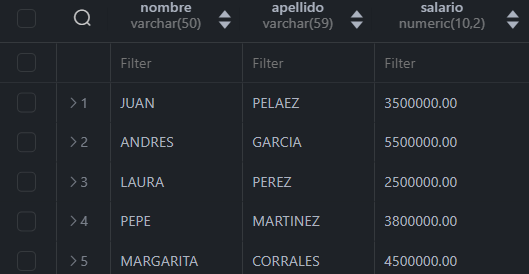


2. Seleccione nombre, apellido y salario de todos los empleados que ganen más 
de 4 millones. 
 - Tomamos la consulta anterior y le agregamos la clasula **WHERE** para filtrar aquellos empleados cuyo salario es mayor (>) a 4 millones (4000000.00):


In [ ]:
SELECT nombre, apellido, salario
FROM empleado
WHERE
    salario >= 4000000.00

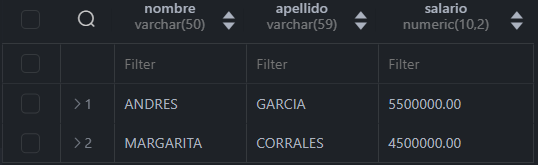


3. Cuente los empleados por sexo.

 - Agrupamos (**GROUP BY**) la tabla 'empleado' por el campo 'sexo'.
 - Seleccionamos el campo 'sexo' y la función de agregación **COUNT()** para realizar el conteo de los registros por sexo. 
 - El campo resultante del conteo se renombra (as) como 'numero_empleados'.
 

In [ ]:
SELECT sexo, COUNT(*) as numero_empleados
FROM empleado
GROUP BY
    sexo

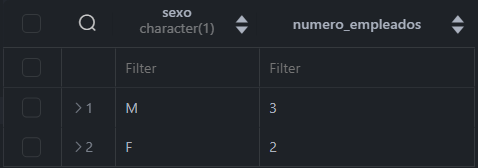

 
4. Seleccione los empleados que no han hecho solicitud de vacaciones. 

 - Combinamos la tabla 'empleado' (e) con la tabla 'vacaciones' (v) a través del id del empleado (**on** v.id_emp = e.id) ultilzando un **LEFT JOIN** con la finalidad de obtener tanto los empleados que han solicitados vacaciones, como los que no lo han hecho. 
 - Seleccionamos todos los campos de la tabla 'empleado' (e.*).
 - Para estos últimos, el campo 'id_emp' o cualquier otro proveniente de la tabla 'vacaciones' resultará ser nulo (**NULL**) al realizar la combinación, por eso agregamos la sentencia **WHERE** para filtrar los empleados que cumplen con esta condición:

In [ ]:
SELECT e.*
FROM empleado as e
    LEFT JOIN vacaciones as v on v.id_emp = e.id
WHERE
    v.id_emp is NULL;

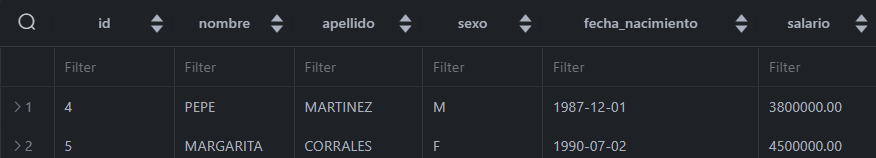


5. Seleccione los empleados que tengan más de una solicitud de vacaciones y 
muestre cuantas solicitudes tienen los que cumplen. 

 - En esta ocasión, la combinación de las dos tablas se realiza utilizando un **INNER JOIN** ya que solo nos interesa obtener los empleados que al menos han hecho una solicitud de vacaciones,
 - Agrupamos (**GROUP BY**) la combinación por los campos 'id', 'nombre' y 'apellido'.
 - Seleccionamos los campos 'id', 'nombre' y 'apellido' y aplicamos la función de agregación **COUNT()** para obtener el número de solicitudes por cada empleado.
 - El campo resultante del conteo se renombra (**as**) como 'numero_solicitudes_vac'.
 - Agregamos la clausula **HAVING** para filtrar aquellos empleados cuyo conteo de número de solicitudes es mayor a 1.

In [ ]:
SELECT e.id, e.nombre, e.apellido, count(*) as numero_solicitudes_vac
FROM empleado as e
    INNER JOIN vacaciones as v on v.id_emp = e.id
GROUP BY
    e.id,
    e.nombre,
    e.apellido
HAVING
    count(*) > 1;

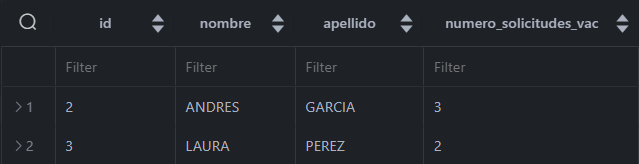


6. Determine el salario promedio de los empleados. 

- Seleccionamos el campo 'salario' de la tabla 'empleado' y le aplicamos la función **AVG()** (average o promedio en español).
- Aplicamos la función **ROUND()** para obtener que el resultado se imprima con dos cifras decimales (opcional)


In [ ]:
SELECT ROUND(avg(SALARIO), 2) AS salario_promedio from empleado

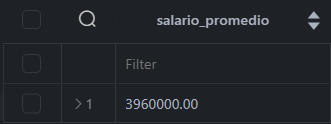


7. Determine la cantidad de días promedio solicitados de vacaciones por cada 
empleado. 

 - Combinamos la tabla 'empleado' (e) con la tabla 'vacaciones' (v) a través del id del empleado (**on** v.id_emp = e.id) ultilzando un **LEFT JOIN** con la finalidad de obtener tanto los empleados que han solicitados vacaciones, como los que no lo han hecho.
 - Agrupamos (**GROUP BY**) la combinación por los campos 'id', 'nombre' y 'apellido'.
 - Seleccionamos los campos 'id', 'nombre' y 'apellido', así como la columna 'cantidad_dias' a la cuál se le aplica la función de agregación **AVG()** para calcular el promedio del campo 'cantidad_dias' por cada empleado.
 - Aplicamos la función **CAST()** para convertir el resultado a un número entero.
 - Aplicamos la función **COALESCE()** para reemplazar los valores nulos por cero, dado que hay empleados que no han solicitado vacaciones y por ende, no están registrados en la tabla 'vacaciones'.
 - El campo resultante del conteo se renombra (**as**) como 'numero_solicitudes_vac'.


In [ ]:
SELECT e.id, e.nombre, e.apellido, COALESCE(
        CAST(avg(cantidad_dias) AS INT), 0
    ) as prom_dias_solicitados
FROM empleado as e
    LEFT JOIN vacaciones as v on v.id_emp = e.id
GROUP BY e.id, e.nombre, e.apellido;

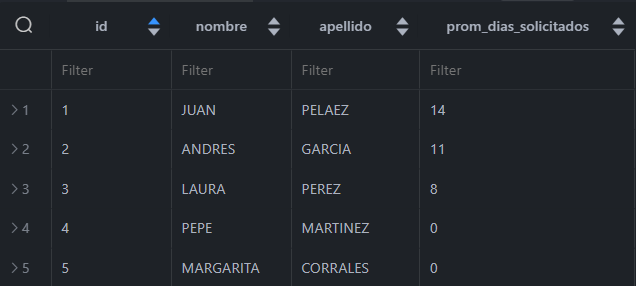


8. Seleccione el empleado que mayor cantidad de días de vacaciones ha 
solicitado, muestre el nombre, apellido y cantidad de días totales solicitados. 

 - Combinamos la tabla 'empleado' (e) con la tabla 'vacaciones' (v) a través del id del empleado (**on** v.id_emp = e.id) ultilzando un **INNER JOIN** con la finalidad de obtener solo los empleados que han solicitados vacaciones. 
 - Seleccionamos los campos 'nombre', 'apellido' y 'cantidad_dias'.
 - Ordenamos (**ORDER BY**) los registros de forma descendente por el campo 'cantidad_dias' para que el primer registro corresponda al empleado que mayor cantidad de días de vacaciones ha solicitado.
 - Utilizamos la clausula **LIMIT** con un valor de 1 para obtener solo ese primer registro.

In [ ]:
SELECT e.nombre, e.apellido, v.cantidad_dias
FROM empleado as e
    INNER JOIN vacaciones as v on v.id_emp = e.id
ORDER BY cantidad_dias desc
limit 1;

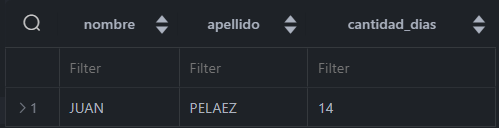


9. Consulte la cantidad de días aprobados y rechazados por cada empleado, 
en caso de no tener solicitudes mostrar 0. 

 - Construímos una CTE (Common Table Expression) en la cuál Combinamos la tabla 'empleado' (e) con la tabla 'vacaciones' (v) a través del id del empleado (**on** v.id_emp = e.id) ultilzando un **LEFT JOIN** con la finalidad de obtener tanto los empleados que han solicitados vacaciones, como los que no lo han hecho.
 - Seleccionamos los campos 'id', 'nombre' y 'apellido', así como la claúsula **CASE** que nos permitirá crear los campos 'aceptado' y 'rechazado' a partir del campo 'estado' de la tabla 'vacaciones', con la siguiente lógica: 
     - Para el campo 'aceptado', si el estado es igual a 'A' (aceptado) el valor del registro en ese campo es 1. De lo contarrio, es cero.
     - Para el campo 'rechazado', si el estado es igual a 'R' (rechazado) el valor del registro en ese campo es 1. De lo contarrio, es cero.  
 - Agrupamos (**GROUP BY**) la CTE por los campos 'id', 'nombre' y 'apeliido'.
 - Seleccionamos los campos 'id', 'nombre' y 'apeliido, así como los campos 'aceptado' y 'rechazado' a los cuáles se les aplica la función de agregación **SUM()** para obtener la cantidad de días aprobados y rechazados por cada empleado.
 - Los campos resultantes de cada suma se renombran (**as**) como solicitudes_aceptadas y solicitudes_rechazadas respectivamente. 

In [ ]:
WITH CTE ( id, nombre, apellido, aceptado, rechazado) AS (
        SELECT e.id, e.nombre, e.apellido,
            CASE
                WHEN v.estado = 'A' THEN 1
                ELSE 0
            END as aceptado,
            CASE
                WHEN v.estado = 'R' THEN 1
                ELSE 0
            END as rechazado
        FROM empleado as e LEFT JOIN vacaciones as v on v.id_emp = e.id)
SELECT id, nombre, apellido, sum(aceptado) as solicitudes_aceptadas, sum(rechazado) as solicitudes_rechazadas
FROM CTE
GROUP BY id, nombre, apellido

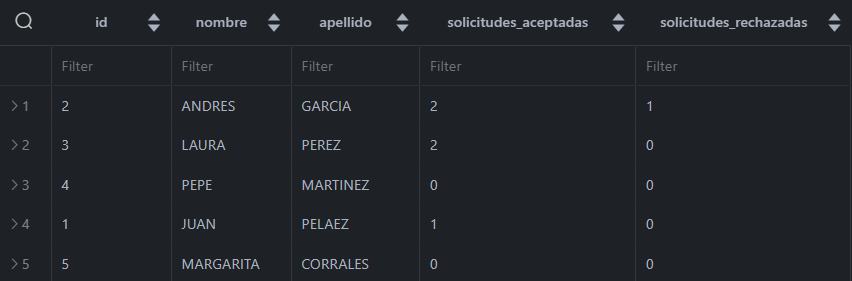